### Author: Pavan Choudhari
### Time to run the notebook is nearly 2 minutes. Thank you for your patience.     
### Date: 11/3/2021
### Question 4: Spam Classifier

In [260]:
import warnings
warnings.filterwarnings("ignore")

### Importing the packages

In [261]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download("wordnet")
from nltk.stem.porter import *
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Downloading the dataset

In [262]:
!curl https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham.tar.bz2 --output 20030228_easy_ham.tar.bz2
!curl https://spamassassin.apache.org/old/publiccorpus/20030228_spam.tar.bz2 --output 20030228_spam.tar.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1574k  100 1574k    0     0  1040k      0  0:00:01  0:00:01 --:--:-- 1039k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1156k  100 1156k    0     0   785k      0  0:00:01  0:00:01 --:--:--  785k


### Extracting the dataset

In [263]:
!tar -xvf 20030228_easy_ham.tar.bz2

easy_ham/
easy_ham/00001.7c53336b37003a9286aba55d2945844c
easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac
easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7
easy_ham/00004.864220c5b6930b209cc287c361c99af1
easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613
easy_ham/00006.253ea2f9a9cc36fa0b1129b04b806608
easy_ham/00007.37a8af848caae585af4fe35779656d55
easy_ham/00008.5891548d921601906337dcf1ed8543cb
easy_ham/00009.371eca25b0169ce5cb4f71d3e07b9e2d
easy_ham/00010.145d22c053c1a0c410242e46c01635b3
easy_ham/00011.fbcde1b4833bdbaaf0ced723edd6e355
easy_ham/00012.48a387bc38d1316a6f6b49e8c2e43a03
easy_ham/00013.81c34741dbed59c6dde50777e27e7ea3
easy_ham/00014.cb20e10b2bfcb8210a1c310798532a57
easy_ham/00015.4d7026347ba7478c9db04c70913e68fd
easy_ham/00016.ef397cef16f8041242e3b6560e168053
easy_ham/00017.08ef2d89f14cf7e2a458b80697eb1837
easy_ham/00018.6fee38026193b5adde4b56892a6f14bc
easy_ham/00019.5322cb10d8819b39499924d852819c27
easy_ham/00020.d10651e31fcb92630c6229ec773cfe26
easy_ham/00021.607c41268c5b0d6

In [264]:
!tar -xvf 20030228_spam.tar.bz2

spam/
spam/00001.7848dde101aa985090474a91ec93fcf0
spam/00002.d94f1b97e48ed3b553b3508d116e6a09
spam/00003.2ee33bc6eacdb11f38d052c44819ba6c
spam/00004.eac8de8d759b7e74154f142194282724
spam/00005.57696a39d7d84318ce497886896bf90d
spam/00006.5ab5620d3d7c6c0db76234556a16f6c1
spam/00007.d8521faf753ff9ee989122f6816f87d7
spam/00008.dfd941deb10f5eed78b1594b131c9266
spam/00009.027bf6e0b0c4ab34db3ce0ea4bf2edab
spam/00010.445affef4c70feec58f9198cfbc22997
spam/00011.61816b9ad167657773a427d890d0468e
spam/00012.381e4f512915109ba1e0853a7a8407b2
spam/00013.d3f0b591a65f116ea5d9d4ad919f83aa
spam/00014.7d38c46424f24fc8012ac15a95a2ac14
spam/00015.048434ab64c86cf890eda1326a5643f5
spam/00016.67fb281761ca1051a22ec3f21917e7c0
spam/00017.1a938ecddd047b93cbd7ed92c241e6d1
spam/00018.5b2765c42b7648d41c93b9b27140b23a
spam/00019.bbc97ad616ffd06e93ce0f821ca8c381
spam/00020.29725cf331fc21e18a1809e7d8b27332
spam/00021.effe1449462a9d7ad7af0f1c94b1a237
spam/00022.8203cdf03888f656dc0381701148f73d
spam/00023.b6d27c684f5fc80

### Email Parsing    
Use the email module to parse the emails

In [265]:
import email
from bs4 import BeautifulSoup
def parse_email(file_path):
  #print('1')
  with open(file_path, 'rb') as f:
    #print('2')
    msg = email.message_from_bytes(f.read())
    #print('3')
  # Get email headers
  subject = msg.get('Subject')
  # Read email’s body
  body = str(msg.get_payload())
  # Remove HTML tags
  body = BeautifulSoup(body).get_text()
  return (subject,body)


In [266]:
basepath = '/content'
import glob
easy_ham_path = glob.glob("/content/easy_ham/*")

In [267]:
basepath = '/content'
import glob
easy_spam_path = glob.glob("/content/spam/*")

In [268]:
easy_ham_path

['/content/easy_ham/00085.badc533c7037554017afb30c94dfcb55',
 '/content/easy_ham/01871.559182646be4765b896699c6b1036739',
 '/content/easy_ham/01889.494c3e4735873024c557ac4b0a4fae61',
 '/content/easy_ham/01084.f085d737f5244ffe14e8743e9226fd30',
 '/content/easy_ham/02459.e4b0d8c4b8389ac7b907935718f694c9',
 '/content/easy_ham/00680.fba9fe0db5780caca8155fb4defdc679',
 '/content/easy_ham/00660.91d1af396b1bc7b8703f5fae9de020d8',
 '/content/easy_ham/01402.602c05e4bdb1f3e4d293f3f9f5a7baad',
 '/content/easy_ham/00547.59bf01e07cf08c7e3a778b747e020989',
 '/content/easy_ham/02136.e5c8edd8057c6d595eb368cde9a8aa41',
 '/content/easy_ham/02428.f441443c176dbaf533553dd0f4940085',
 '/content/easy_ham/02404.da865baa8492a392d7a5a035f0d3b7a0',
 '/content/easy_ham/02396.0a7da4e5438d7316dd2fa1cf838dce13',
 '/content/easy_ham/00564.e6fc359c277f507a2e01198b9c60ae61',
 '/content/easy_ham/01123.c9c1c0a854f47b3249e596fc2bb361ed',
 '/content/easy_ham/02228.af711080d4eb57589dbdae3ebb10cd83',
 '/content/easy_ham/0140

### Reading all the emails text into a list

In [269]:
parsed_easy_ham = []
for i in easy_ham_path:
  ret = parse_email(i)
  parsed_easy_ham.append(ret)

In [270]:
parsed_easy_spam = []
for i in easy_spam_path:
  ret = parse_email(i)
  parsed_easy_spam.append(ret)

In [271]:
parsed_easy_ham

[('RE: Java is for kiddies',
  'On Mon, 2 Sep 2002, Russell Turpin wrote:\n\n> Adam Beberg:\n> >Considering 90% of the fake job posting I see are for embedded systems or\n> >device drivers - C still rules the world.\n>\n> There is a lot of C++ in the embedded world. With static object\n> allocation and a few other programming techniques, performance\n> differences disappear, but C++ gives a boost in development and\n> maintainability.\n\nAgreed, not much difference there. With C it just doesnt seem as wrong to\nbe crawling around in registers and things. Quite frankly you cant fit\n_that_ big of a project into a 32K ROM, so large project issues dont matter\nas much in the embedded world.\n\nAnd in the realtime space, or when you have data coming in at 2Gbit/sec\n[fibrechannel], every cycle DOES count.\n\n> The real issue is compiler availability. Almost every embedded platform\n> has C cross-compilers. Many have C++ compilers. But there is still a\n> range of platforms that have the fi

In [272]:
len(parsed_easy_ham)

2501

In [273]:
parsed_easy_spam

[('FORTUNE 500 WORK AT HOME REPS NEEDED!',
  'Immediate Help Needed.  We are a fortune 500 company that is \ngrowing at a tremendous rate of over 1000% per year. We simply cannot \nkeep up. We are looking for motivated individuals who are looking to \nearn a substantial income working from home. \n\nThis is a real opportunity to make an excellent income from home. No \nexperience is required.  We will provide you with any training you may need. \n\nWe are looking for energetic and self motivated people.  If that is you \nthan click on the link below and complete our online information request \nform, \nand one of our employment specialist will contact you. \n\nhttp://ter.netblah.com:27000\n\nSo if you are looking to be employed at home, with a career that will \nprovide you vast opportunities and a substantial income, please fill \nout our online information request form here now: \n\nhttp://ter.netblah.com:27000\n\n\nTo be removed from our list simply click on the link below now: \n\n

In [274]:
len(parsed_easy_spam)

501

As we can see that there are 2501 emails of ham category and 501 emails of spam category.

### Text Preprocessing    
In this section, I have experimented with using different kinds of text processing techniques. But, changing to lowercase, substituting url's with the tag url, substituting email's with webaddress, removing punctations works the best for this usecase. 

In [275]:
#from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
import re
def preprocessing(parsed_list):
  processed = []
  for i in parsed_list:
    text0 = str(i[0]) + i[1]
    text = text0.lower()
    text1 = re.sub(r'https?:.*(?=\s)', ' url ', text)
    text2 = re.sub(r'[a-zA-Z-]+@[a-zA-Z-]+.[a-zA-Z-]+.\w{2,4}|\w+.com',' webaddress ',text1)
    # Remove numbers
    # text3 = re.sub(r'\b[\d.]+\b|\b\d+\w+\b',' number ',text2)
    # Removing punctuations
    text4 = re.sub(r'([^\w\s]+)|([_-]+)',' ',text2)
    # Remove one and 2 letter words
    # text5 = re.sub(r'\b\w{1,3}\b',' ',text4)
    # text6 = re.sub(r'\n|\n\n|\s+|\r',' ',text4)
    
    
    # text7 = text6.strip(" ")
    # Removing Stop words
    #splitted = text7.split(" ")
    #text8 = " ".join([stemmer.stem(lemmatizer.lemmatize(word)) for word in splitted if word not in stopwords.words('english')])
    # Let's perform 
    #text9 = re.sub(r'\n|\n\n|\s+|\r',' ',text8)
    processed.append(text4)
  return processed




Cleaning the ham data.

In [276]:
import pandas as pd
all_processed_ham = preprocessing(parsed_easy_ham)
ham = pd.DataFrame(list(zip(all_processed_ham,["ham"]*2501)),columns=['text','target'])

In [277]:
ham

,text,target
0,re java is for kiddieson mon 2 sep 2002 rus...,ham
1,lest anyone doubt that brent has a good heart ...,ham
2,laura bush s 419 letterurl url \ndate not s...,ham
3,re url \n on fri feb 01 2002 at 05 41 32p...,ham
4,zzzzteana re amazingly accurate for a sund...,ham
...,...,...
2496,re arrrghhh had gpg working now it doesnt h...,ham
2497,underwater high voltage photographyurl url \...,ham
2498,re anolther sequence related tracebackyou can...,ham
2499,re satalk url blacklistspamtalk said \n pr...,ham


Cleaning the spam data

In [278]:
all_processed_spam = preprocessing(parsed_easy_spam)
spam = pd.DataFrame(list(zip(all_processed_spam,["spam"]*len(all_processed_spam))),columns=['text','target'])

In [279]:
spam

,text,target
0,fortune 500 work at home reps needed immediate...,spam
1,garden ornaments ppuour delightful garden w...,spam
2,lenders webaddress pete for your mortgage ...,spam
3,the tba doctor walks the walk on diabetes,spam
4,looking for property in spain,spam
...,...,...
496,gb2312 b 0rvn kgwu92hsczsz8kjrnk71bnm7m c1qot...,spam
497,do you need a second mortgage ...,spam
498,adv mortgage quotes fast online no cost\n\nh...,spam
499,if you dont webaddress petition will ...,spam


### Merging both the dataframes into one

In [280]:
df = pd.concat([ham,spam])

In [281]:
df

,text,target
0,re java is for kiddieson mon 2 sep 2002 rus...,ham
1,lest anyone doubt that brent has a good heart ...,ham
2,laura bush s 419 letterurl url \ndate not s...,ham
3,re url \n on fri feb 01 2002 at 05 41 32p...,ham
4,zzzzteana re amazingly accurate for a sund...,ham
...,...,...
496,gb2312 b 0rvn kgwu92hsczsz8kjrnk71bnm7m c1qot...,spam
497,do you need a second mortgage ...,spam
498,adv mortgage quotes fast online no cost\n\nh...,spam
499,if you dont webaddress petition will ...,spam


### Discretizing the data into training and testing sets

In [282]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size = 0.3, random_state = 77)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

X_train:  2101
X_test:  901
y_train:  2101
y_test:  901


### Converting to vectors by TFIDF

I tried CountVectorizer, but it gave very poor result.

In [283]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features = 3000)
#X_train_cv = cv.fit_transform(X_train)

In [284]:
#X_train_cv.shape

In [285]:
#X_test_cv = cv.fit_transform(X_test)
#X_test_cv.shape

### Term frequency–inverse document frequency

In [286]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',min_df=4,max_df=0.9)
X = vectorizer.fit_transform(X_train)

In [287]:
X_t = vectorizer.transform(X_test)

In [288]:
X.shape

(2101, 7201)

In [289]:
X_t.shape

(901, 7201)

In [290]:
y_train.shape

(2101,)

### Trying out different models

#### 1) Multinomial Naive Bayes

In [291]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
mn = MultinomialNB(alpha = 0.5)
mn.fit(X,y_train)

y_mn = mn.predict(X_t)

Naive Bayes accuracy score:  0.9556048834628191
Naive Bayes confusion matrix heatmap: 



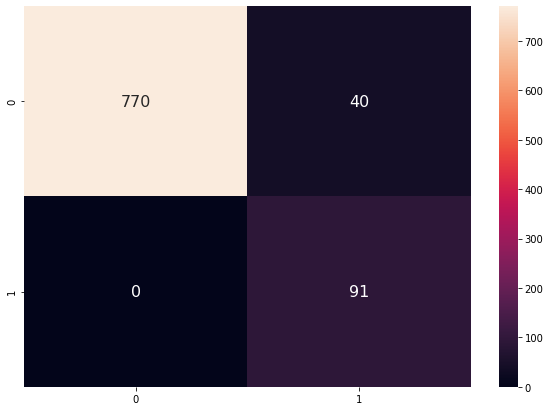

Naive Bayes classification report 
               precision    recall  f1-score   support

         ham       0.95      1.00      0.97       770
        spam       1.00      0.69      0.82       131

    accuracy                           0.96       901
   macro avg       0.98      0.85      0.90       901
weighted avg       0.96      0.96      0.95       901



In [292]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Naive Bayes accuracy score: ', accuracy_score( y_mn , y_test))
print('Naive Bayes confusion matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_mn, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Naive Bayes classification report \n',classification_report(y_test, y_mn))

In [293]:
from sklearn.linear_model import LogisticRegression
logisr = LogisticRegression()
logisr.fit(X,y_train)
y_logisr = logisr.predict(X_t)

Logistic Regression accuracy score:  0.9433962264150944
Logistic Regression matrix heatmap: 



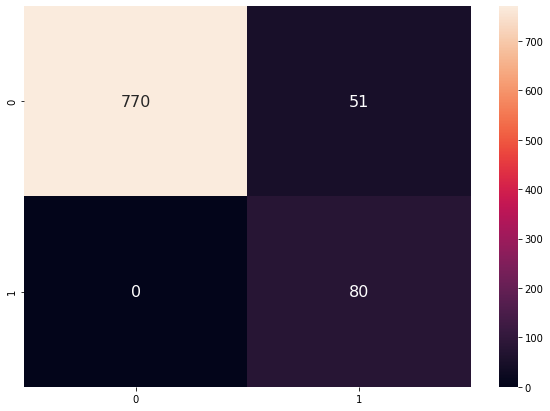

Logistic Regression classification report 
               precision    recall  f1-score   support

         ham       0.94      1.00      0.97       770
        spam       1.00      0.61      0.76       131

    accuracy                           0.94       901
   macro avg       0.97      0.81      0.86       901
weighted avg       0.95      0.94      0.94       901



In [294]:
print('Logistic Regression accuracy score: ',accuracy_score(y_test,y_logisr))
print('Logistic Regression matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_logisr, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Logistic Regression classification report \n',classification_report(y_test, y_logisr))

In [295]:
from sklearn.neighbors import KNeighborsClassifier
kaync = KNeighborsClassifier(n_neighbors=21)
kaync.fit(X,y_train)

y_kaync = kaync.predict(X_t)

KNeighbors accuracy score:  0.9567147613762487
KNeighbors confusion matrix heatmap: 



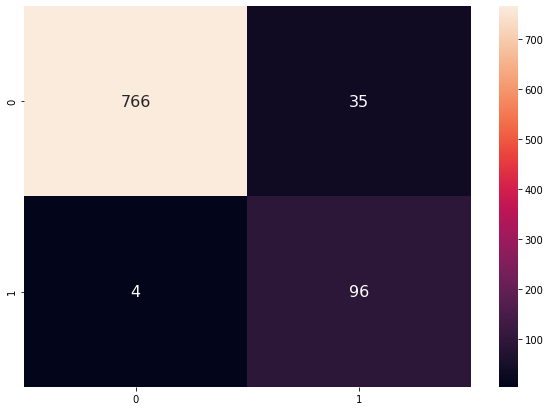

KNeighbors classification report 
               precision    recall  f1-score   support

         ham       0.96      0.99      0.98       770
        spam       0.96      0.73      0.83       131

    accuracy                           0.96       901
   macro avg       0.96      0.86      0.90       901
weighted avg       0.96      0.96      0.95       901



In [296]:
print('KNeighbors accuracy score: ',accuracy_score(y_test,y_kaync))
print('KNeighbors confusion matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_kaync, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('KNeighbors classification report \n',classification_report(y_test, y_kaync))

In [297]:
from sklearn.tree import DecisionTreeClassifier
dectc = DecisionTreeClassifier(min_samples_split=10, random_state=252)
dectc.fit(X,y_train)
y_dectc = dectc.predict(X_t)

Decision Tree accuracy score:  0.9411764705882353
Decision Tree confusion matrix heatmap: 



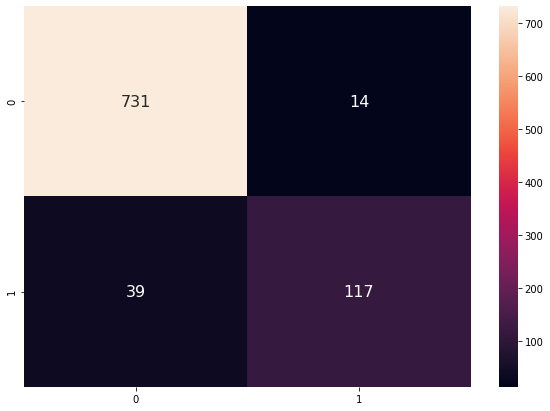

Decision Tree classification report 
               precision    recall  f1-score   support

         ham       0.98      0.95      0.97       770
        spam       0.75      0.89      0.82       131

    accuracy                           0.94       901
   macro avg       0.87      0.92      0.89       901
weighted avg       0.95      0.94      0.94       901



In [298]:
print('Decision Tree accuracy score: ',accuracy_score(y_test,y_dectc))
print('Decision Tree confusion matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_dectc, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Decision Tree classification report \n',classification_report(y_test, y_dectc))

In [299]:
from sklearn.ensemble import ExtraTreesClassifier
extc = ExtraTreesClassifier(n_estimators=500, random_state=7)
extc.fit(X,y_train)
y_extc = extc.predict(X_t)

Extra Tree accuracy score:  0.9733629300776915
Extra Tree confusion matrix heatmap: 



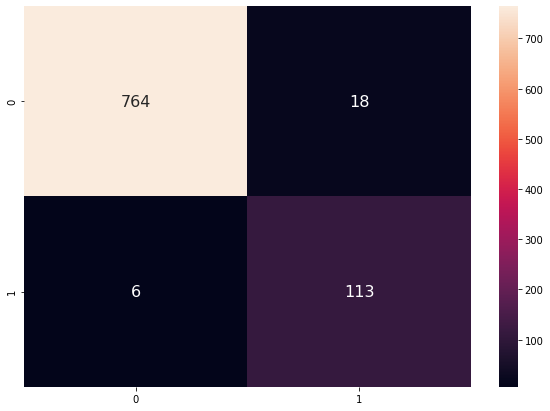

Extra Tree classification report 
               precision    recall  f1-score   support

         ham       0.98      0.99      0.98       770
        spam       0.95      0.86      0.90       131

    accuracy                           0.97       901
   macro avg       0.96      0.93      0.94       901
weighted avg       0.97      0.97      0.97       901



In [300]:
print('Extra Tree accuracy score: ',accuracy_score(y_test,y_extc))
print('Extra Tree confusion matrix heatmap: \n')
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_extc, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()
print('Extra Tree classification report \n',classification_report(y_test, y_extc))

The best classifier for this use case that I was able to attain is a Extra Tree Classifier. It is an ensembling method. It has a reasonably high precision of 0.95 and recall of 0.86.     

### Confusion matrix and classification report of best model
1) Training set


Confusion Matrix of train set

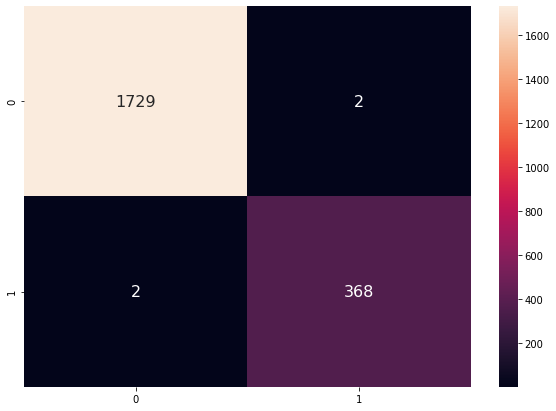

In [301]:
y_extc_train = extc.predict(X)
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_extc_train, y_train),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()

Classification Report of train set

In [302]:
print('Extra Tree classification report for training set \n',classification_report(y_train, y_extc_train))

Extra Tree classification report for training set 
               precision    recall  f1-score   support

         ham       1.00      1.00      1.00      1731
        spam       0.99      0.99      0.99       370

    accuracy                           1.00      2101
   macro avg       1.00      1.00      1.00      2101
weighted avg       1.00      1.00      1.00      2101



2) Test Set

Confusion Matrix of test set

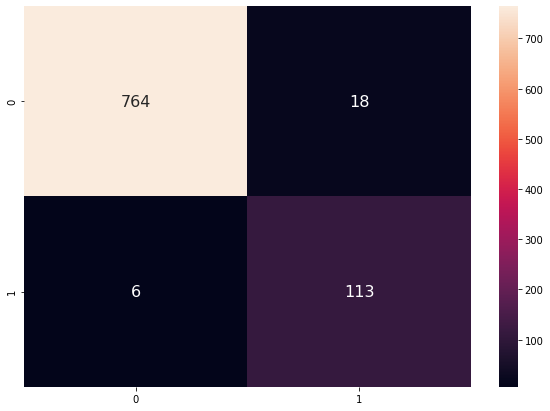

In [303]:
plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix(y_extc, y_test),annot=True, annot_kws={"size": 16},fmt = "d")
plt.show()

Classification Report of test set


In [304]:
print('Extra Tree classification report \n',classification_report(y_test, y_extc))

Extra Tree classification report 
               precision    recall  f1-score   support

         ham       0.98      0.99      0.98       770
        spam       0.95      0.86      0.90       131

    accuracy                           0.97       901
   macro avg       0.96      0.93      0.94       901
weighted avg       0.97      0.97      0.97       901



### Effect of training set on classifier performance

In [305]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
result = []
for j in np.arange(0.1, 1, 0.1):
  X_train, X_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size = j, random_state = 77)
  vectorizer = TfidfVectorizer(stop_words='english',min_df=4,max_df=0.9)
  X = vectorizer.fit_transform(X_train)
  X_t = vectorizer.transform(X_test)
  extc = ExtraTreesClassifier(n_estimators=500, random_state=7)
  extc.fit(X,y_train)
  y_extc = extc.predict(X_t)
  error_score = 1 - accuracy_score(y_test,y_extc)
  result.append(error_score)

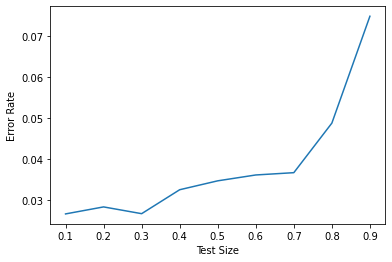

In [306]:
plt.plot(np.arange(0.1, 1, 0.1),result)
plt.xlabel('Test Size')
plt.ylabel('Error Rate')
plt.show()

As the size of the training set decreases, the error goes up as seen from the graph. This is because, there are fewer and fewer data points to train on, therefore driving the error up as the model cannot generalize well on unseen data.

In [307]:
#from collections import Counter
#goat = spam_text.apply(lambda x: list(Counter(x.split(" ")).items()))
#goat

# Getting the common words in both the spam and ham dataset.

In [308]:
spam_text = spam['text'].apply(lambda x: re.sub(r'\n|\n\n|\s+|\r',' ',x))
ham_text = ham['text'].apply(lambda x: re.sub(r'\n|\n\n|\s+|\r',' ',x))
spam_word_list = [j for i in spam_text for j in i.split(" ")]
ham_word_list = [j for i in ham_text for j in i.split(" ")]
common_word_list = set(spam_word_list)&set(ham_word_list)
#common_list = list(set(list(goat2.keys()))&set(list(goat4.keys())))

In [309]:
spam_d = {}
for w in spam_word_list:
  if w in common_word_list:
    if w not in spam_d:
      spam_d[w] = 1
    else:
      spam_d[w]+=1

In [310]:
total = 0
for i,j in spam_d.items():
  total += j

In [311]:
spam_tot = {k: v / total for k, v in spam_d.items()}

In [312]:
ham_d = {}
for w in ham_word_list:
  if w in common_word_list:
    if w not in ham_d:
      ham_d[w] = 1
    else:
      ham_d[w]+=1

In [313]:
total1 = 0
for i,j in ham_d.items():
  total1 += j

In [314]:
ham_tot = {k: v / total1 for k, v in ham_d.items()}

In [315]:
import math
indicative = []
for i in common_word_list:
  value = math.log(spam_tot[i]/ham_tot[i])
  indicative.append((i,value))  

In [316]:
indicative.sort(reverse=True,key=lambda x: x[1])

In [317]:
indicative[1:6]

[('3c', 5.607510703136685),
 ('des', 5.342818148909602),
 ('mailings', 5.123455320435299),
 ('kingdom', 5.0138931179237725),
 ('font', 4.722696103364547)]

The five words that are highly indicative of the spam class are **3c, des, mailings, kingdom and font.**